In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Reading dataset from local

df=pd.read_csv(r"application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,NaN,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,NaN,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(307511, 122)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(40), object(16)
memory usage: 286.2+ MB


## Data Cleaning

In [5]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

#### Handling the null values

In [6]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol=df.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)


64

In [7]:
# Removing those 64 columns
emptycol = list(emptycol[emptycol.values>=0.3].index)
df.drop(labels=emptycol,axis=1,inplace=True)


In [8]:
# Checking the columns having less null percentage

df.isnull().sum()/len(df)*100


SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000650
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [9]:
# Filling missing values with median since unlike mean,it does not get affected by the extreme values i the dataframe.

values=df['AMT_ANNUITY'].median()

df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values


##### Searching for the column for null values

df.isnull().sum()


In [10]:
# Removing rows having null values greater than or equal to 30%

emptyrow=df.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(df)].index)
df.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))


0


In [11]:
# We will remove unwanted columns from this dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted,axis=1,inplace=True)



In [12]:
df[df['CODE_GENDER']=='XNA'].shape


(4, 28)

In [13]:
df[df['ORGANIZATION_TYPE']=='XNA'].shape


(55374, 28)

In [14]:
df['CODE_GENDER'].value_counts()


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [15]:
# Updating the column 'CODE_GENDER' with "F" for the dataset as majority of them is Female, so we can conclude this

df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()


F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [16]:
df['ORGANIZATION_TYPE'].describe()


count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [17]:
df['ORGANIZATION_TYPE'].value_counts()


Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [18]:
df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape


(0, 28)

In [19]:
df['ORGANIZATION_TYPE'].value_counts()


Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

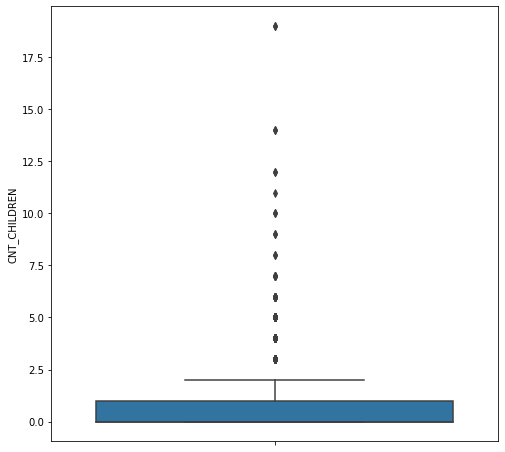

In [20]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,y='CNT_CHILDREN')

In [21]:
# Deleting the outliers(discontinuous values above the upper fence in the boxplot) from the dateset
df=df[df.CNT_CHILDREN<=2]
df.shape

(247972, 28)

In [22]:
#  Loading Previous Data Sheet
previous_application=pd.read_csv(r"previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
previous_application.shape


(1048575, 37)

In [24]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.048575e+06,1.048575e+06,815566.000000,1.048575e+06,1.048575e+06,4.891790e+05,8.076100e+05,1.048575e+06,1.048575e+06,489179.000000,...,3721.000000,1.048575e+06,1.048575e+06,815569.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000
mean,1.922775e+06,2.784367e+05,15891.265151,1.742698e+05,1.950000e+05,6.700778e+03,2.262892e+05,1.248486e+01,9.964123e-01,0.079619,...,0.774922,-8.820381e+02,3.183904e+02,15.995639,342387.346201,13833.802031,33614.930898,76591.061435,81985.701661,0.331530
std,5.329366e+05,1.028569e+05,14745.557438,2.910789e+05,3.169407e+05,2.078570e+04,3.134490e+05,3.333140e+00,5.979011e-02,0.107882,...,0.099514,7.792649e+02,7.996734e+03,14.508109,88595.441587,72460.126454,106643.960780,149653.053854,153298.887247,0.470764
min,1.000001e+06,1.000010e+05,0.000000,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000014,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.460642e+06,1.893860e+05,6301.350000,1.890000e+04,2.427750e+04,0.000000e+00,5.058000e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.303000e+03,-1.000000e+00,6.000000,365243.000000,-1626.000000,-1241.000000,-1313.000000,-1269.000000,0.000000
50%,1.923419e+06,2.788100e+05,11250.000000,7.081650e+04,8.025300e+04,1.624500e+03,1.115116e+05,1.200000e+01,1.000000e+00,0.051062,...,0.835095,-5.830000e+02,4.000000e+00,12.000000,365243.000000,-830.000000,-361.000000,-537.000000,-498.000000,0.000000
75%,2.384448e+06,3.677445e+05,20523.003750,1.800000e+05,2.152395e+05,7.749000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.810000e+02,8.500000e+01,24.000000,365243.000000,-410.000000,128.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,418058.145000,6.905160e+06,6.905160e+06,2.150100e+06,6.905160e+06,2.300000e+01,1.000000e+00,0.989740,...,1.000000,-2.000000e+00,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [25]:
previous_application.columns


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [26]:
previous_application_percent = round(100*(previous_application.isnull().sum()/len(previous_application.index)), 2)


In [27]:
previous_application.isnull().sum()


SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     233009
AMT_APPLICATION                      0
AMT_CREDIT                           0
AMT_DOWN_PAYMENT                559396
AMT_GOODS_PRICE                 240965
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               559396
RATE_INTEREST_PRIMARY          1044854
RATE_INTEREST_PRIVILEGED       1044854
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 515140
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [28]:
# Removing rows having null values greater than or equal to 30%

emptyrow1=previous_application.isnull().sum(axis=1)
emptyrow1=list(emptyrow1[emptyrow1.values>=0.3*len(previous_application)].index)
previous_application.drop(labels=emptyrow1,axis=0,inplace=True)
print(len(emptyrow1))


0


In [29]:
print(previous_application.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_ANNUITY                  815566 non-null   float64
 4   AMT_APPLICATION              1048575 non-null  float64
 5   AMT_CREDIT                   1048575 non-null  float64
 6   AMT_DOWN_PAYMENT             489179 non-null   float64
 7   AMT_GOODS_PRICE              807610 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 9   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 12  RATE_DOWN_PAYMENT            489179 non-nu

In [30]:
#Merging Data Sets
application_prev_data = df.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')



In [31]:
print(application_prev_data.shape)


(703574, 64)


In [32]:
application_prev_data.head(10)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
4,100008,0,Cash loans,M,N,Y,0.0,99000.0,490495.5,27517.5,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-339.0,-69.0,-69.0,-66.0,0.0
5,100008,0,Cash loans,M,N,Y,0.0,99000.0,490495.5,27517.5,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
6,100008,0,Cash loans,M,N,Y,0.0,99000.0,490495.5,27517.5,...,Connectivity,6.0,low_normal,POS mobile with interest,365243.0,-2491.0,-2341.0,-2341.0,-2334.0,0.0
7,100008,0,Cash loans,M,N,Y,0.0,99000.0,490495.5,27517.5,...,Consumer electronics,30.0,middle,Cash X-Sell: middle,365243.0,-609.0,261.0,-399.0,-388.0,1.0
8,100008,0,Cash loans,M,N,Y,0.0,99000.0,490495.5,27517.5,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-2299.0,-2029.0,-2029.0,-703.0,0.0
9,100009,0,Cash loans,F,Y,Y,1.0,171000.0,1560726.0,41301.0,...,Consumer electronics,12.0,low_action,POS household without interest,365243.0,-418.0,-88.0,-88.0,-84.0,0.0


In [33]:
# Casting all Appl variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric)
df.head(5)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
5,100008,0,Cash loans,M,N,Y,0.0,99000.0,490495.5,27517.5,...,-477,WEDNESDAY,16,0,0,0,0,0,0,Other
6,100009,0,Cash loans,F,Y,Y,1.0,171000.0,1560726.0,41301.0,...,-619,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3


In [34]:
# Creating segments for the income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)


In [35]:
# Creating Segment for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)



In [36]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]

## Univariate Analysis

In [37]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                    float64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64
REG_REGION_NOT_WORK_REGION        int64
LIVE_REGION_NOT_WORK_REGION       int64
REG_CITY_NOT_LIVE_CITY            int64


In [38]:
df.TARGET.value_counts(normalize=True)

0    0.913643
1    0.086357
Name: TARGET, dtype: float64

- Around 8% of the clients have had difficulty repaying th loan amount.

In [39]:
df.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.646500
Single / not married    0.158179
Civil marriage          0.104443
Separated               0.063999
Widow                   0.026870
Unknown                 0.000008
Name: NAME_FAMILY_STATUS, dtype: float64

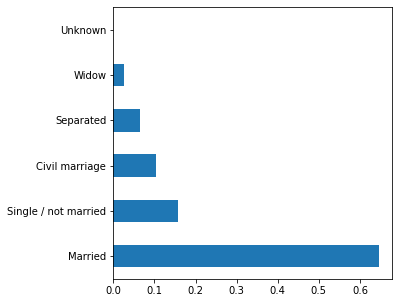

In [40]:
plt.figure(figsize=(5,5))
df.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.show()

- Around 65% of the Applicants are Married.

In [41]:
df.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.686267
Higher education                 0.265300
Incomplete higher                0.038948
Lower secondary                  0.008941
Academic degree                  0.000544
Name: NAME_EDUCATION_TYPE, dtype: float64

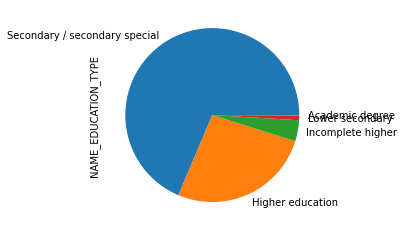

In [42]:
df.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.show()

- More than 68% applicants are atleast Secondary pass-outs.

In [43]:
df.AMT_INCOME_RANGE.value_counts(normalize=True)

125000-150000       0.158078
200000-225000       0.142887
100000-125000       0.138229
75000,100000        0.117231
150000-175000       0.116501
175000-200000       0.102733
50000-75000         0.047538
250000-275000       0.045642
225000-250000       0.025777
300000-325000       0.024511
350000-375000       0.016554
275000-300000       0.014905
425000-450000       0.011275
500000 and above    0.009997
325000-350000       0.007767
25000-50000         0.007727
400000-425000       0.006561
375000-400000       0.004525
475000-500000       0.001101
450000-475000       0.000460
0-25000             0.000000
Name: AMT_INCOME_RANGE, dtype: float64

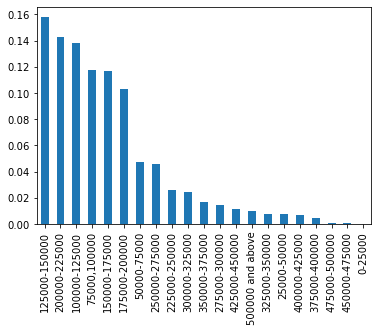

In [44]:
df.AMT_INCOME_RANGE.value_counts(normalize=True).plot.bar()
plt.show()

- Around 30% applicants fall in the income bracket of 125K-225K.

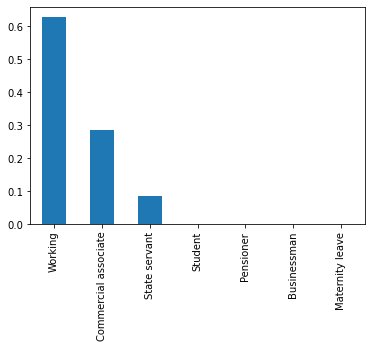

In [45]:
df.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

- Majority clients are in the working category.

## Bivariate Analysis

In [46]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE'],
      dtype='object')

In [47]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                    float64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64
REG_REGION_NOT_WORK_REGION        int64
LIVE_REGION_NOT_WORK_REGION       int64
REG_CITY_NOT_LIVE_CITY            int64


In [48]:
df.groupby('CODE_GENDER')['TARGET'].mean()

CODE_GENDER
F    0.075380
M    0.104545
Name: TARGET, dtype: float64

- On an average, 7.5% Females and 10% Males are the ones with difficulty paying the loan annuity.

In [49]:
(df.groupby('NAME_INCOME_TYPE')['TARGET'].mean()).sort_values(ascending=False)

NAME_INCOME_TYPE
Maternity leave         0.400000
Working                 0.095616
Commercial associate    0.074701
State servant           0.057336
Student                 0.000000
Pensioner               0.000000
Businessman             0.000000
Name: TARGET, dtype: float64

- As is seen, clients on Maternity leave are finding difficulties while loan repayment.

In [50]:
(df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean()).sort_values(ascending=False)

NAME_EDUCATION_TYPE
Lower secondary                  0.136220
Secondary / secondary special    0.097770
Incomplete higher                0.087285
Higher education                 0.055148
Academic degree                  0.022222
Name: TARGET, dtype: float64

- Major loan non-payers fall in the Lower secondary category of education.

In [51]:
(df.groupby('NAME_HOUSING_TYPE')['TARGET'].mean()).sort_values(ascending=False)

NAME_HOUSING_TYPE
Rented apartment       0.126709
With parents           0.117436
Municipal apartment    0.089777
Co-op apartment        0.085890
House / apartment      0.083490
Office apartment       0.066578
Name: TARGET, dtype: float64

- So the picture is clear! Clients living in a rented flat have diffculty repaying the loans. Also the ones living with parents.

<function matplotlib.pyplot.show(*args, **kw)>

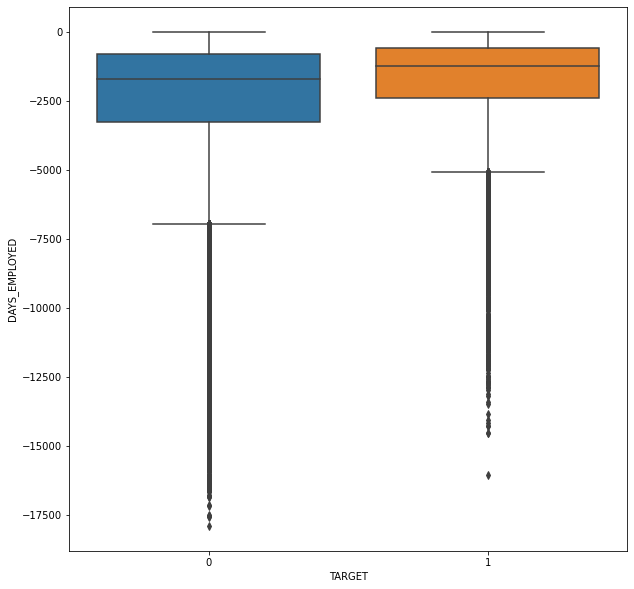

In [52]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='TARGET',y='DAYS_EMPLOYED')
plt.show

- Clients who are newly employed(lesser employment days) are in the defaulter's list of non-payment. While those employed for longer period are repaying annuity on time.

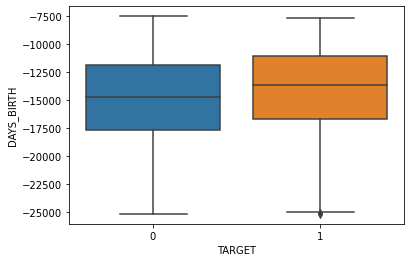

In [53]:
sns.boxplot(data=df, x='TARGET',y='DAYS_BIRTH')

- Major chunk of non-payers are in the age group of 30-42, while the payers are comparatively older.

## Mutlivariate Analysis

- We have to find the top 10 correlations for the driver pairs in the dataset.

<function matplotlib.pyplot.show(*args, **kw)>

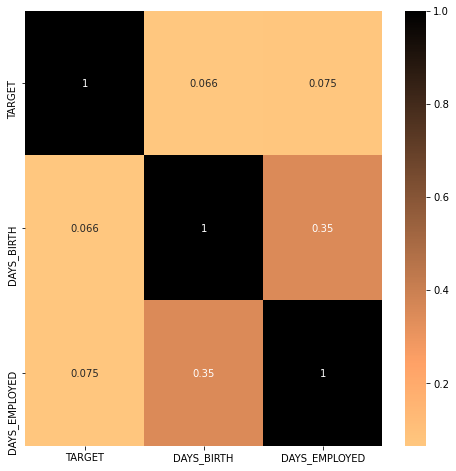

In [54]:
plt.figure(figsize=(8,8))
sns.heatmap(df[['TARGET','DAYS_BIRTH','DAYS_EMPLOYED']].corr(),annot=True,cmap='copper_r')
plt.show

- There's hardly any effect of days of birth and days of employnment on the Target variable.

<function matplotlib.pyplot.show(*args, **kw)>

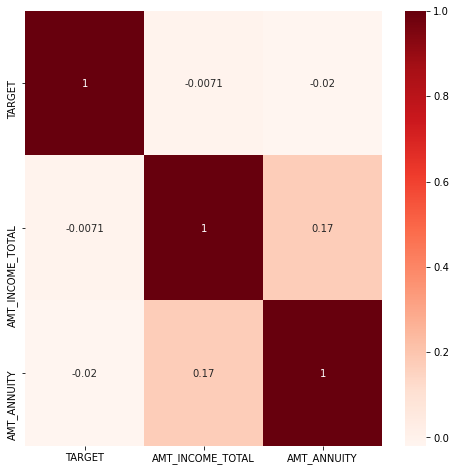

In [55]:
plt.figure(figsize=(8,8))
sns.heatmap(df[['TARGET','AMT_INCOME_TOTAL','AMT_ANNUITY']].corr(),annot=True,cmap='Reds')
plt.show

- The heatmap depicts a weak negative correlation b/w Target and Income(-.0073),and Target and Annuity amount(-.02)  which means Income and annuity amount aren't affecting the non-repayment of loans.

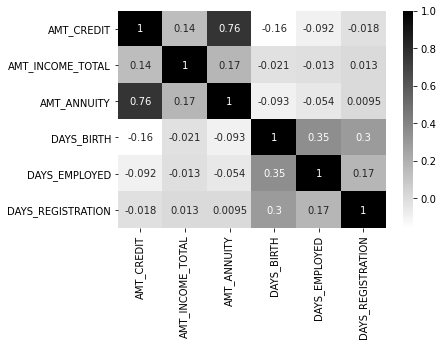

In [56]:
sns.heatmap(df[['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION']].corr(),annot=True,cmap='gray_r')


- AMT_ANNUIT and AMT_CREDIT have a strong correlation of (+.76).

In [57]:
application_prev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703574 entries, 0 to 703573
Data columns (total 64 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    703574 non-null  int64  
 1   TARGET                        703574 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          703574 non-null  object 
 3   CODE_GENDER                   703574 non-null  object 
 4   FLAG_OWN_CAR                  703574 non-null  object 
 5   FLAG_OWN_REALTY               703574 non-null  object 
 6   CNT_CHILDREN                  703574 non-null  float64
 7   AMT_INCOME_TOTAL              703574 non-null  float64
 8   AMT_CREDIT_x                  703574 non-null  float64
 9   AMT_ANNUITY_x                 703574 non-null  float64
 10  NAME_INCOME_TYPE              703574 non-null  object 
 11  NAME_EDUCATION_TYPE           703574 non-null  object 
 12  NAME_FAMILY_STATUS            703574 non-nul

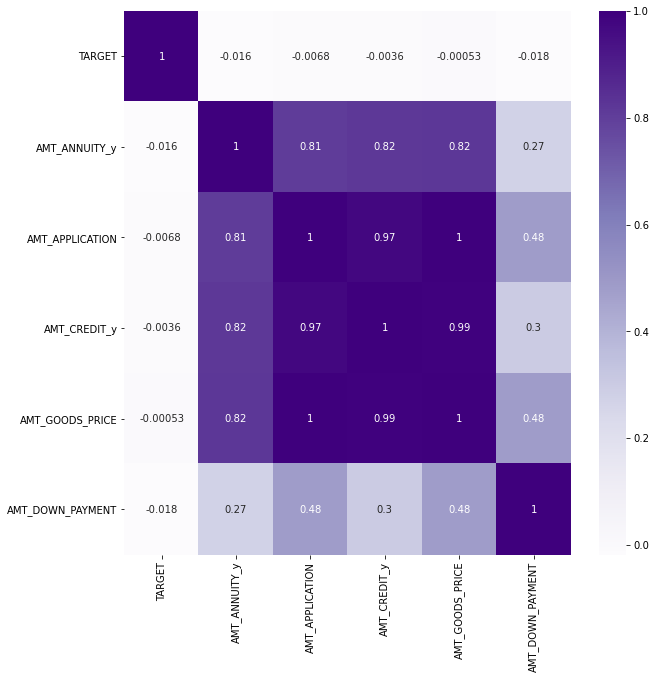

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(application_prev_data[['TARGET','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE','AMT_DOWN_PAYMENT']].corr(),annot=True,cmap='Purples')

- Pairs among AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE,AMT_GOOSD_PRICE have high positive correlations.

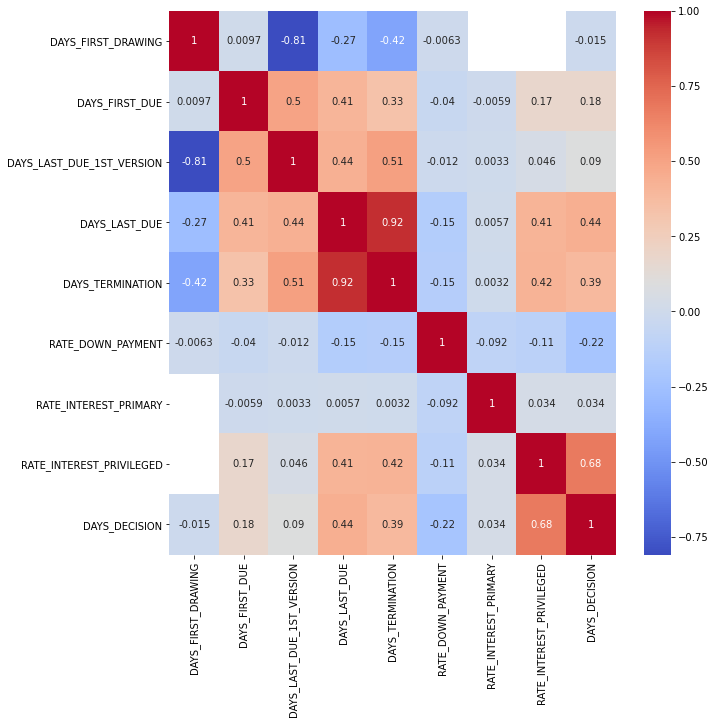

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(application_prev_data[['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','DAYS_DECISION']].corr(),annot=True,cmap='coolwarm')

#### Top 10 correlations among the driver pairs are as follows:

1) AMT_APPLICATION & AMT_GOODS_PRICE = +1

2) AMT_CREDIT_y & AMT_GOODS_PRICE = +0.99

3) AMT_APPLICATION & AMT_CREDIT_y = +0.97

4) DAYS_LAST_DUE & DAYS_TERMINATION = +0.92 

5) AMT_CREDIT_y & AMT_ANNUITY_y = +0.82

6) AMT_ANNUITY_y & AMT_APPLICATION = +0.81

7) DAYS_LAST_DUE_1ST_VERSION & DAYS_FIRST_DRAWING = -0.81

8) AMT_ANNUITY & AMT_CREDIT = +0.76

9) RATE_INTEREST_PRIVILEGED & DAYS_DECISION = +0.68

10) DAYS_LAST_DUE_1ST_VERSION & DAYS_TERMINATION = +0.51

### The End 